# Decision tree example

Murine data: https://www.biorxiv.org/content/10.1101/2020.12.19.423629v1.full

In [ ]:
import random
import pandas as pd
random.seed(8675309)

# uncomment to produce the subsampled data
'''

X = pd.read_csv('data/murine_expression.csv')

# thin out so that p >> n
keep = random.sample(range( X.shape[0]), 50)
X = X.iloc[keep,:]
y = pd.read_csv("data/murine_annotations.csv")
y = y.loc[keep,:]

X['Class'] = y

X.to_csv('data/murine_expression_reduced.csv', index=False)
'''

data = pd.read_csv("data/murine_expression_reduced.csv")

X = data.drop('Class', axis = 1)
y = data['Class']

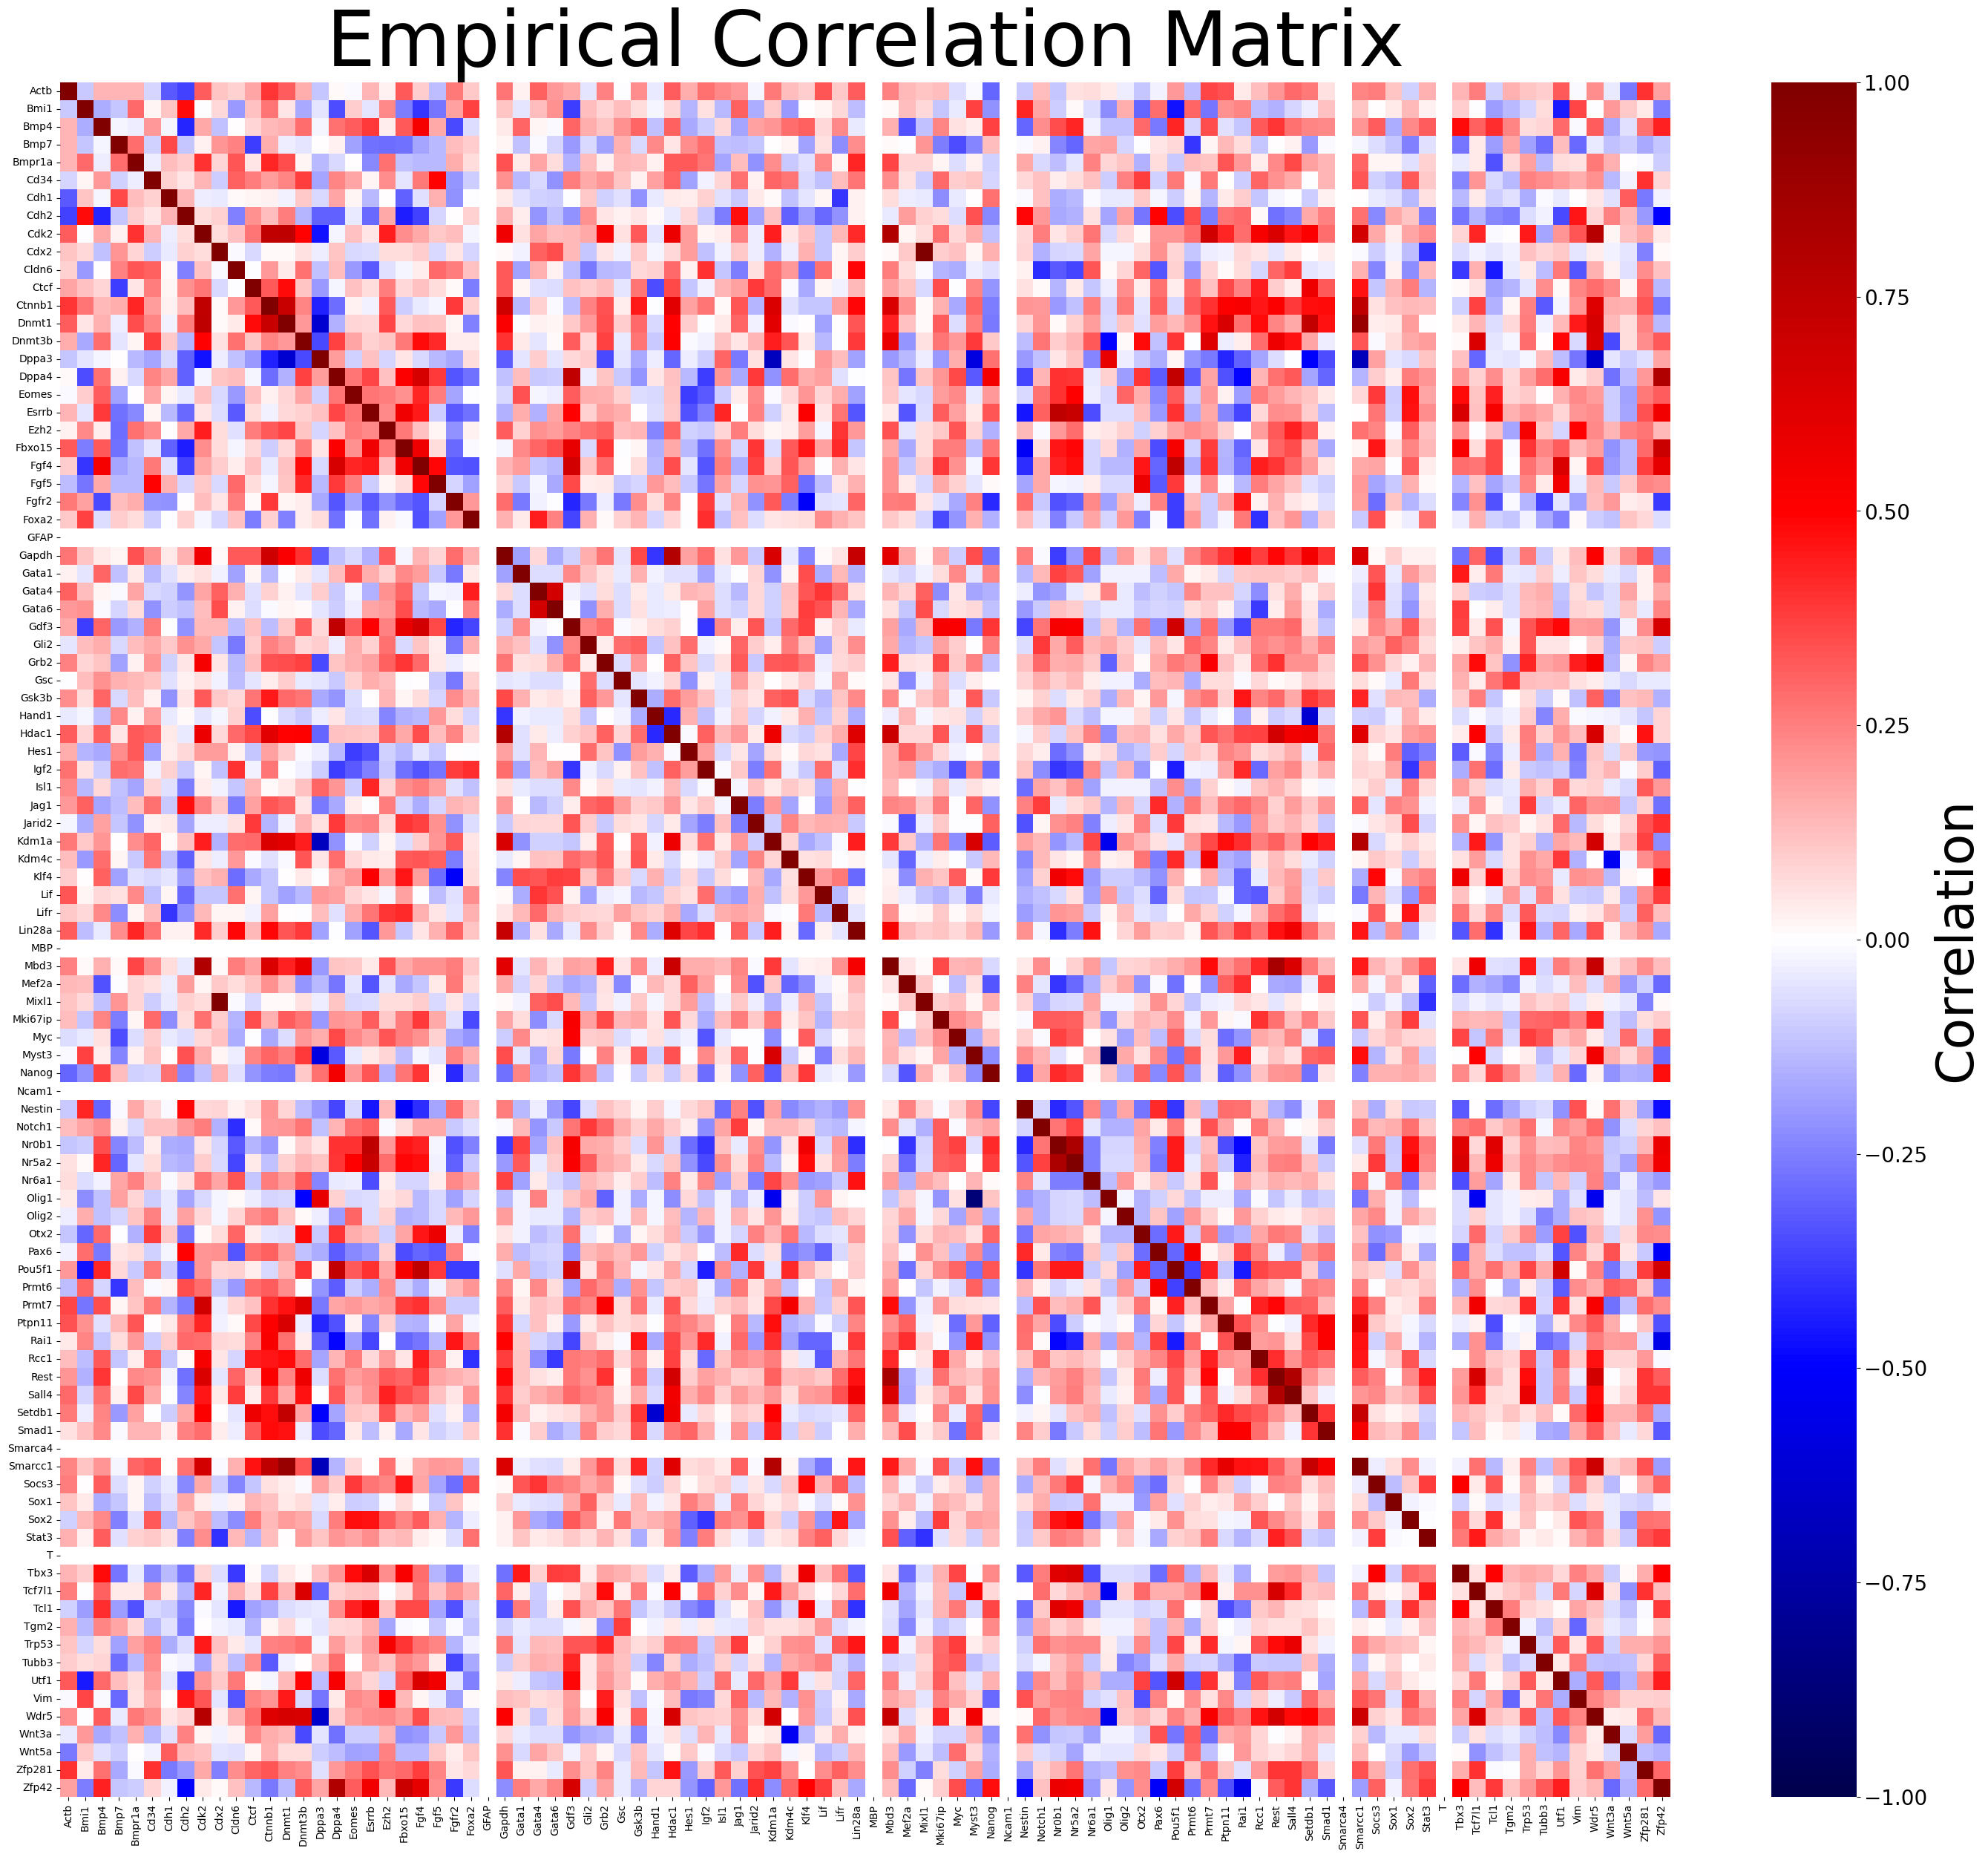

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(35, 30))
ax = sns.heatmap(X.corr(), cmap  ='seismic', vmin = -1, vmax = 1,
            cbar_kws={'label': 'Correlation'})
ax.set_title("Empirical Correlation Matrix", fontsize =75)
# Get the colorbar object
cbar = ax.collections[0].colorbar
# Set the font size of the colorbar labels
cbar.ax.tick_params(labelsize=20)
ax.figure.axes[-1].yaxis.label.set_size(50)
plt.savefig("figures/dt_correlations.png", dpi = 300, bbox_inches = 'tight')


In [3]:
path = "results/decision_tree/prob_weights10000_dataset0JNone.pkl"

import pickle


with open(path, 'rb') as f:
    data = pickle.load(f)

In [4]:
import numpy as np
sorted_values = sorted(data.items(), key=lambda item: item[1])

In [ ]:
import pickle
with open("results/decision_tree/prob_weights10000_dataset0JNone.pkl", 'rb') as file:
    data = pickle.load(file)

In [6]:
for key, val in data.items():  
    if val in np.sort(list(data.values()))[-3:]: # get the top 3 trees
        print(val,key)

0.0474 ('|--- feature_30 <=\n|   |--- feature_47 <=\n|   |   |--- class: NPC\n|   |--- feature_47 >\n|   |   |--- class: EPI\n|--- feature_30 >\n|   |--- feature_95 <=\n|   |   |--- feature_38 <=\n|   |   |   |--- class: EPI\n|   |   |--- feature_38 >\n|   |   |   |--- class: NPC\n|   |--- feature_95 >\n|   |   |--- class: ESC\n',)
0.0224 ('|--- feature_30 <=\n|   |--- feature_55 <=\n|   |   |--- class: NPC\n|   |--- feature_55 >\n|   |   |--- class: EPI\n|--- feature_30 >\n|   |--- feature_95 <=\n|   |   |--- feature_38 <=\n|   |   |   |--- class: EPI\n|   |   |--- feature_38 >\n|   |   |   |--- class: NPC\n|   |--- feature_95 >\n|   |   |--- class: ESC\n',)
0.028 ('|--- feature_66 <=\n|   |--- class: NPC\n|--- feature_66 >\n|   |--- feature_44 <=\n|   |   |--- feature_23 <=\n|   |   |   |--- class: EPI\n|   |   |--- feature_23 >\n|   |   |   |--- class: NPC\n|   |--- feature_44 >\n|   |   |--- class: ESC\n',)


# Visualize the top 3 trees 

Split values at each node are not considered in deciding whether two models are different

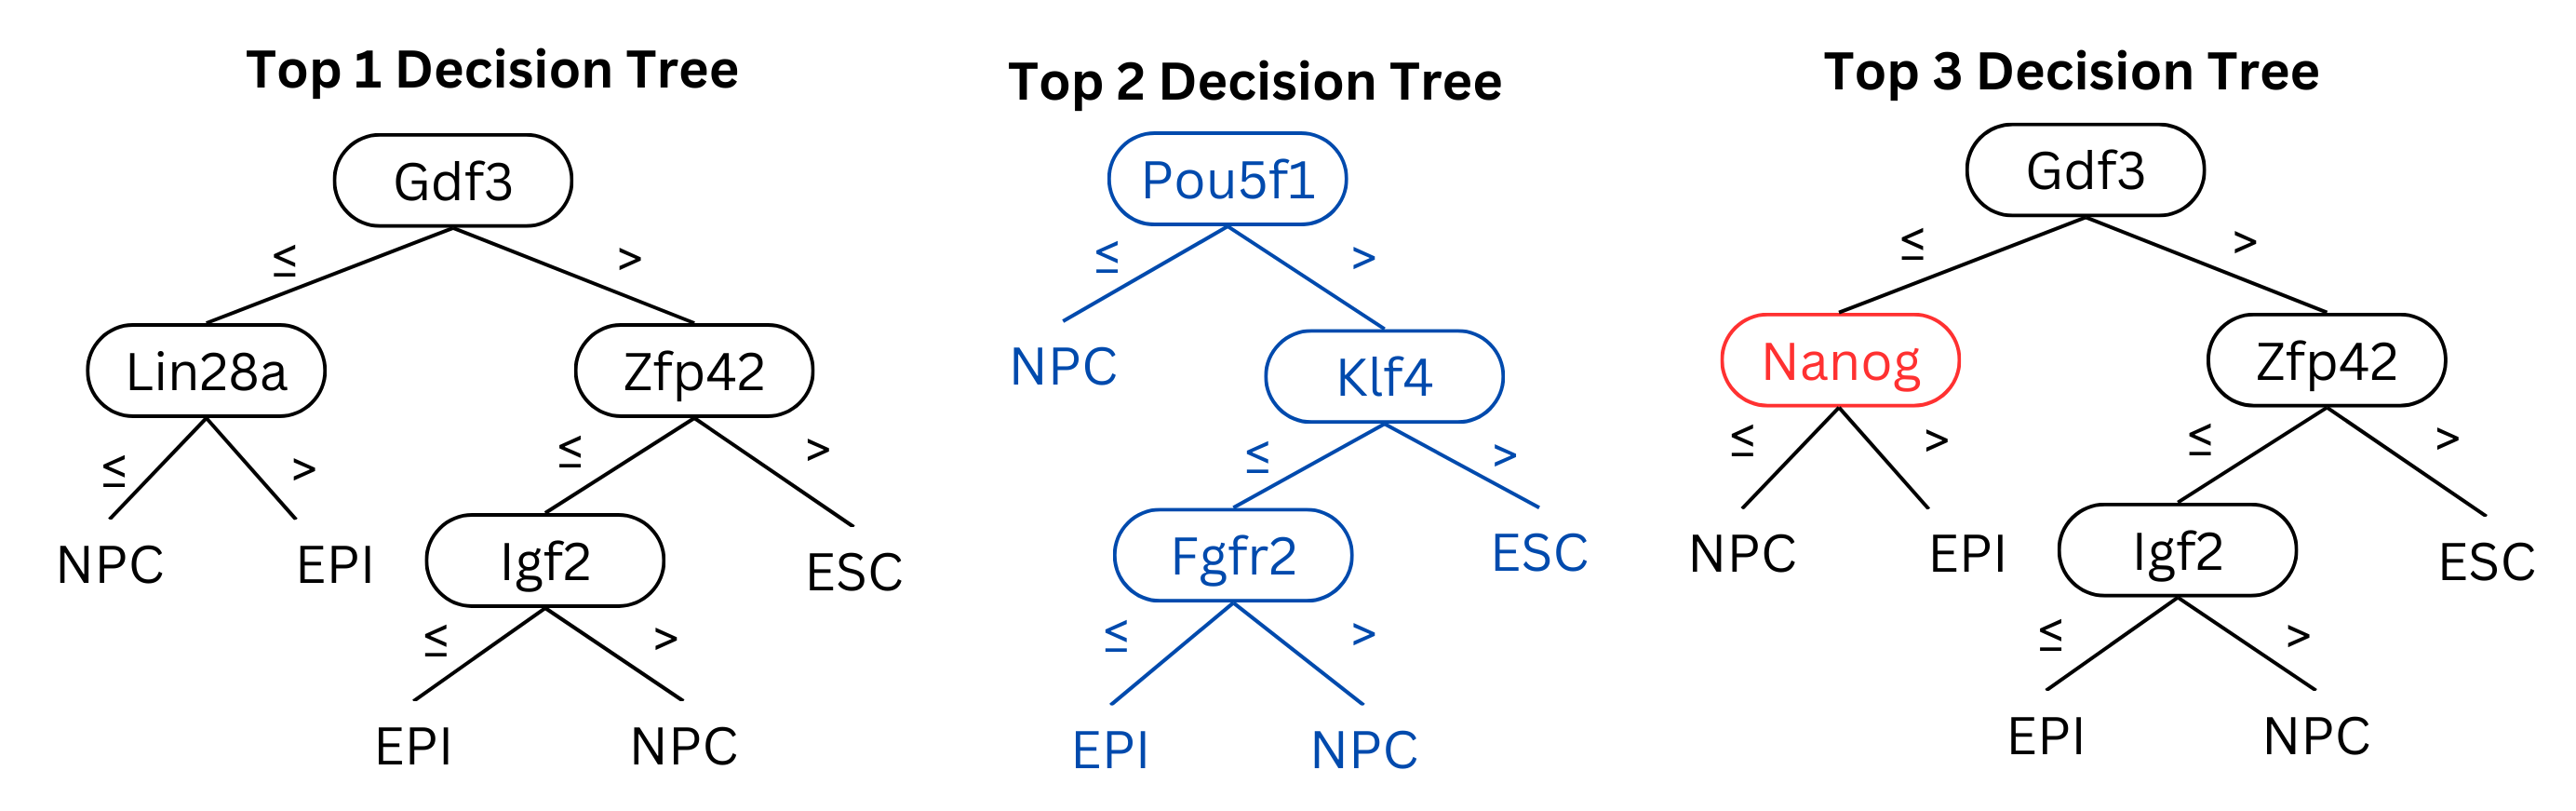

In [7]:
from IPython.display import Image
Image(filename = "figures/top_trees.png", width=1000, height=1000)